# Stable diffusion XL (sd xl)

Using model stabilityai/stable-diffusion-xl-base-1.0 with diffuser StableDiffusionXLPipeline

## Install requirements

In [1]:
!python.exe -m pip install --upgrade pip

Defaulting to user installation because normal site-packages is not writeable


In [2]:
%pip install -r ../requirements-torch-windows.txt --upgrade
%pip install -r ../requirements.txt --upgrade

Defaulting to user installation because normal site-packages is not writeable
Looking in indexes: https://download.pytorch.org/whl/cu117
Note: you may need to restart the kernel to use updated packages.
Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


## Init stable diffusion

- https://huggingface.co/stabilityai/stable-diffusion-xl-base-1.0
- https://huggingface.co/docs/diffusers/api/pipelines/stable_diffusion/stable_diffusion_xl

In [3]:
from diffusers import AutoPipelineForText2Image
import torch

xlturbopipeline = AutoPipelineForText2Image.from_pretrained("stabilityai/sdxl-turbo", torch_dtype=torch.float16, variant="fp16")
xlturbopipeline.to("cuda")


Loading pipeline components...:   0%|          | 0/7 [00:00<?, ?it/s]

StableDiffusionXLPipeline {
  "_class_name": "StableDiffusionXLPipeline",
  "_diffusers_version": "0.24.0",
  "_name_or_path": "stabilityai/sdxl-turbo",
  "feature_extractor": [
    null,
    null
  ],
  "force_zeros_for_empty_prompt": true,
  "image_encoder": [
    null,
    null
  ],
  "scheduler": [
    "diffusers",
    "EulerAncestralDiscreteScheduler"
  ],
  "text_encoder": [
    "transformers",
    "CLIPTextModel"
  ],
  "text_encoder_2": [
    "transformers",
    "CLIPTextModelWithProjection"
  ],
  "tokenizer": [
    "transformers",
    "CLIPTokenizer"
  ],
  "tokenizer_2": [
    "transformers",
    "CLIPTokenizer"
  ],
  "unet": [
    "diffusers",
    "UNet2DConditionModel"
  ],
  "vae": [
    "diffusers",
    "AutoencoderKL"
  ]
}

See API doc for all available options
https://huggingface.co/docs/diffusers/api/pipelines/stable_diffusion/stable_diffusion_xl#diffusers.StableDiffusionXLPipeline

In [4]:
def generate(prompt1, prompt2=None, height=1024, width=1024, negative_prompt1=None, negative_prompt2=None, seed=42, num_inference_steps=3):
    generator = torch.Generator("cuda").manual_seed(seed)
    # image = xlturbopipeline(prompt1, prompt2, height=height,width=width,negative_prompt=negative_prompt1,negative_prompt_2=negative_prompt2, generator=generator, num_inference_steps=num_inference_steps ).images[0]
    image = xlturbopipeline(prompt=prompt1, num_inference_steps=num_inference_steps, guidance_scale=0.0).images[0]
    fname = f"../images/{prompt1.replace(' ','-')}.png"
    image.save(fname)
    display(image)
    return image

# Run

  0%|          | 0/3 [00:00<?, ?it/s]

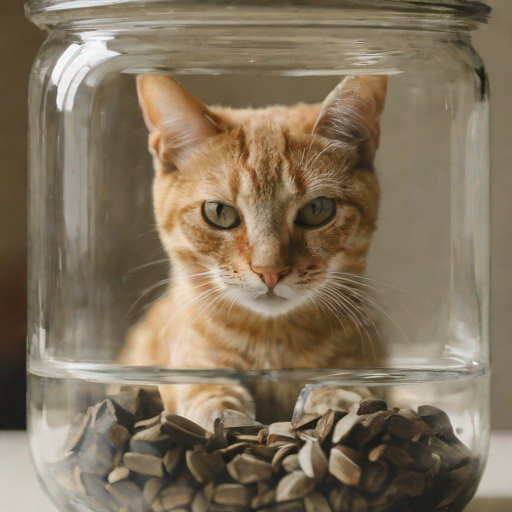

  0%|          | 0/3 [00:00<?, ?it/s]

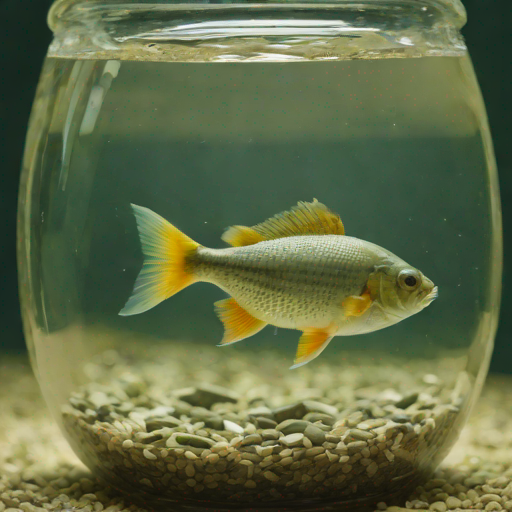

In [5]:
# img = generate("a photo of an astronaut riding a horse on mars")
img = generate("un chat dans un bocal")
img = generate("un poisson dans un bocal")

# Using utils

Loading pipeline components...:   0%|          | 0/7 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

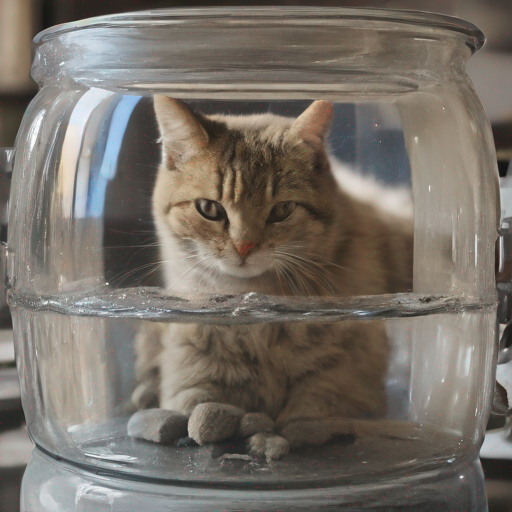

In [1]:
from sdutils.utils_stablediffusion import sdxlturboPipeline
sdxlpipe = sdxlturboPipeline()
image = sdxlpipe.generate("un chat dans un bocal")
display(image)